In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer 

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer_data = pd.DataFrame(data['data'],columns=data['feature_names'])

In [6]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [9]:
X = cancer_data

In [10]:
Y = data['target']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
from sklearn.svm import SVC

svc_model = SVC()

In [13]:
svc_model.fit(X_train,Y_train)

SVC()

In [14]:
prediction = svc_model.predict(X_test)

In [15]:
Y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(prediction,Y_test))

[[36  0]
 [ 6 72]]


In [17]:
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.92      0.96        78

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



# C and Gamma

In [18]:
params = {
    'C' : [0.001,0.01,0.1,1,10,100,1000],
    'gamma' :[1,0.1,0.001,0.0001,0.00001,0.000001,0.0000001]
    
}

In [19]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(),params,verbose=3)

In [20]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ..................C=0.001, gamma=1;, score=0.626 total time=   0.0s
[CV 2/5] END ..................C=0.001, gamma=1;, score=0.626 total time=   0.0s
[CV 3/5] END ..................C=0.001, gamma=1;, score=0.626 total time=   0.0s
[CV 4/5] END ..................C=0.001, gamma=1;, score=0.626 total time=   0.0s
[CV 5/5] END ..................C=0.001, gamma=1;, score=0.626 total time=   0.0s
[CV 1/5] END ................C=0.001, gamma=0.1;, score=0.626 total time=   0.0s
[CV 2/5] END ................C=0.001, gamma=0.1;, score=0.626 total time=   0.0s
[CV 3/5] END ................C=0.001, gamma=0.1;, score=0.626 total time=   0.0s
[CV 4/5] END ................C=0.001, gamma=0.1;, score=0.626 total time=   0.0s
[CV 5/5] END ................C=0.001, gamma=0.1;, score=0.626 total time=   0.0s
[CV 1/5] END ..............C=0.001, gamma=0.001;, score=0.626 total time=   0.0s
[CV 2/5] END ..............C=0.001, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]},
             verbose=3)

In [21]:
grid_search.best_params_

{'C': 1000, 'gamma': 1e-05}

In [22]:
grid_search.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [23]:
predictions = grid_search.predict(X_test)

In [24]:
print(confusion_matrix(predictions,Y_test))

[[36  1]
 [ 6 71]]


<Axes: >

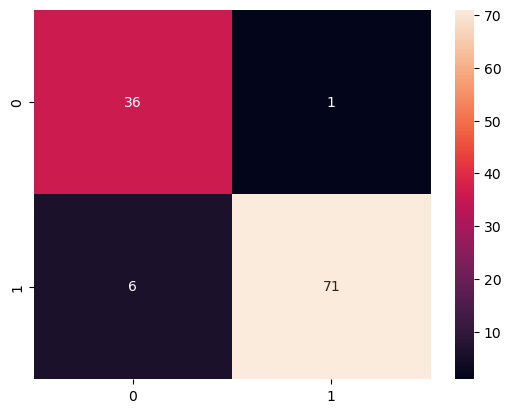

In [25]:
sns.heatmap(confusion_matrix(predictions,Y_test),annot=True)